In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import gc
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#追記
import json;import datetime;import math
#importじゃないけど、個人的には省略されて良いことがあまりないので・・
pd.set_option('display.max_columns', 500);pd.set_option('display.max_rows', 1000)

In [5]:
df_vr = pd.read_csv("../data/viewing_rating.csv", encoding = "cp932")

In [6]:
df_vr

,TV_station,time_table,drama_title,Episode1,Episode2,Episode3,Episode4,Episode5,Episode6,Episode7,Episode8,Episode9,Episode10,Episode11,Episode12,Episode13,Episode14,Episode15,average,suii,start_at
0,CX,月21,シャーロック,12.8,9.3,9.9,10.6,9.3,8.3,9.9,8.9,9.9,8.8,9.8,-,-,-,-,9.90%,5-5-0,2019/10/1
1,CX,火22,まだ結婚できない男,11.5,7.7,10.0,9.5,10,8.9,8.5,8.6,9,9.7,-,-,-,-,-,9.40%,5-4-0,2019/10/1
2,TBS,火22,G線上のあなたと私,7.8,8.8,7.3,6.9,6.7,6.7,8.6,7.6,6.5,9.6,-,-,-,-,-,7.65%,2003/5/1,2019/10/1
3,NTV,水22,同期のサクラ,8.1,9.5,9.3,11.5,11.8,11.7,12.2,10.8,10.3,13.7,-,-,-,-,-,10.89%,5-4-0,2019/10/1
4,EX,木21,ドクターX,20.3,19.0,18.1,17.8,15.9,19.3,18.6,17.4,18.2,19.3,-,-,-,-,-,18.48%,3-6-0,2019/10/1
5,CX,木22,モトカレマニア,5.6,5.2,4.1,3.0,4.6,4.1,4.3,4.7,4.2,-,-,-,-,-,-,4.46%,3-5-0,2019/10/1
6,NTV,木23,CHEAT,4.2,3.0,4.4,3.0,3.1,2.9,3.5,3.7,3.5,3.2,-,-,-,-,-,3.45%,4-5-0,2019/10/1
7,TBS,金22,4分間のマリーゴールド,10.3,7.8,7.6,6.2,7.1,5.7,7.1,6.4,7,9.2,-,-,-,-,-,7.52%,4-5-0,2019/10/1
8,EX,金23,時効警察はじめました,7.7,6.1,5.9,4.9,6.3,6.2,5.5,5.5,-,-,-,-,-,-,-,6.01%,2001/5/1,2019/10/1
9,NTV,土22,俺の話は長い,8.4,9.0,8.9,8.4,8,7.7,7.4,9.1,7.2,10.4,-,-,-,-,-,8.45%,3-6-0,2019/10/1


In [10]:
df_vr["extension_rate"] =  df_vr["average"].apply(lambda x: float(x[:-1])) / df_vr["Episode1"]

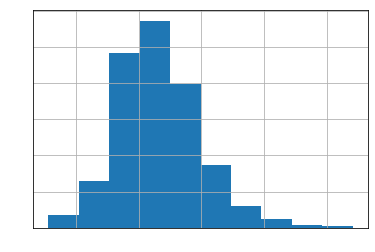

In [15]:
plt.tick_params(colors='white')
df_vr["extension_rate"].hist()




In [33]:
df_vr[df_vr["extension_rate"]<0.8].count()[0]

309

In [41]:
df_vr[df_vr["extension_rate"]>0.91].count()[0]

307

In [42]:
df_vr[(df_vr.extension_rate<0.91) & (df_vr.extension_rate>0.8)].count()[0]

321